# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [ ]:
import requests
from bs4 import BeautifulSoup

def collect_hacker_news_titles_and_votes(page_num = 1):
  url = f"https://news.ycombinator.com/news?p={page_num}"
  html = requests.get(url).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  
  trs = soup.findAll('tr', attrs={'class':"athing"})
  titles_scores = {}
  for tr in trs:
    id = tr['id']
    title = tr.find('a', attrs={'class':"titlelink"})
    title = title.text.strip()
    score = soup.find('span', attrs={'class':"score", 'id':f"score_{id}"})
    if score is None:
      score = 0
    else:
      score = score.text.strip()

    titles_scores[title] = score

  return titles_scores

  
collect_hacker_news_titles_and_votes(page_num=1)

{'55 GiB/s FizzBuzz': '739 points',
 'Animated guide to Symex: Emacs structural editing with Lisp': '103 points',
 'Ask HN: Anyone Here Using Stenography': '15 points',
 "Byberry Mental Hospital, Philadelphia's House of Horrors": '25 points',
 'Compute vs. Hardware': '18 points',
 'Computer-1 mini-ITX Chassis': '364 points',
 "Debian's Which Hunt": '320 points',
 'Epistemic Minor Leagues': '102 points',
 'Facebook Renames to Meta': '907 points',
 "Facebook Unceremoniously Kills Off 'Oculus' Brand": '99 points',
 'How nimble Keyence grew into a $140B titan': '36 points',
 'I was rejected by Codecademy three times, so I built my own': '716 points',
 'IPv6 Progress Top Sites 2021': '67 points',
 'In 1783, an English rector predicted black holes using classical mechanics': '305 points',
 'Open-Source Babelfish for Postgres': '126 points',
 'Potato Toys (1931)': '15 points',
 'Reasons Truck Drivers Walk Out the Door [video]': '25 points',
 'Remote-first work is taking over the rich world': 

**Question 2**:  Write a function that collects data on four James Bond movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [ ]:
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb, Movie

def collect_james_bond_movies_data(api_key, search_words, print_top_n):
  tmdb = TMDb()
  tmdb.api_key = api_key
  tmdb.language = 'en'
  tmdb.debug = True

  movie = Movie()
  search_res = []
  for search_word in search_words:
    search = movie.search(search_word)
    newlist = sorted(search, key=lambda d: d['popularity'], reverse=True) 
    search_res.append(newlist)
    
    print(f'\nTop {print_top_n} search results for {search_word} sorted by popularity:')
    for res in newlist[:print_top_n]:
      print(f"\tid: {res.id}, title: {res.title}")
      print(f"\toverview: {res.overview}")
      print(f"\tposter_path: {res.poster_path}")
      print(f"\tpopularity: {res.popularity}, vote_average: {res.vote_average}")
  return search_res



In [ ]:
#ADD YOUR API KEY
tmdb_api_key = ''
print('Searching for "James Bond" directly yielded no relevant movies, even after being sorted by popularity.')
search_res = collect_james_bond_movies_data(api_key=tmdb_api_key, search_words=['James Bond'], print_top_n=2)

print("\nTherefore, I searched seperatly for 4 different James Bond movies")
search_res = collect_james_bond_movies_data(api_key=tmdb_api_key, search_words=['Skyfall', 'Casino Royale', 'Goldfinger', 'from russia with love'], print_top_n=1)


Searching for "James Bond" directly yielded no relevant movies, even after being sorted by popularity.

Top 2 search results for James Bond sorted by popularity:
	id: 869250, title: Being James Bond
	overview: Daniel Craig candidly reflects on his 15 year adventure as James Bond. Including never-before-seen archival footage from Casino Royale to the upcoming 25th film No Time To Die, Craig shares his personal memories in conversation with 007 producers, Michael G Wilson and Barbara Broccoli.
	poster_path: /kKG9gieki5wgEcVXLfnX1lbOcrO.jpg
	popularity: 15.646, vote_average: 7
	id: 368155, title: Happy Anniversary 007: 25 Years of James Bond
	overview: An hour documentary on the history of Bond for the 25th anniversary of the film series.
	poster_path: /mVeyZnJBNXFX6C02Hya1ZahH3xH.jpg
	popularity: 11.848, vote_average: 6.3

Therefore, I searched seperatly for 4 different James Bond movies

Top 1 search results for Skyfall sorted by popularity:
	id: 37724, title: Skyfall
	overview: When Bo

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

In [ ]:
import json
import pandas as pd

!mkdir /root/.kaggle/
# Installing the Kaggle package
!pip install kaggle 

#!!!fill your api key!!!
api_token = {"username":"","key":""}

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

!mkdir ./datasets
# Creating a dataset directory
!mkdir ./datasets/kickstarter

# download the dataset from Kaggle and unzip it
!kaggle datasets download kemical/kickstarter-projects -f ks-projects-201801.csv -p ./datasets/kickstarter
!unzip ./datasets/kickstarter/*.zip  -d ./datasets/kickstarter
# Load data
df_kickstarter = pd.read_csv('./datasets/kickstarter/ks-projects-201801.csv')


 59% 12.0M/20.4M [00:00<00:00, 119MB/s]
100% 20.4M/20.4M [00:00<00:00, 130MB/s]
Archive:  ./datasets/kickstarter/ks-projects-201801.csv.zip
  inflating: ./datasets/kickstarter/ks-projects-201801.csv  


In [ ]:
df_kickstarter

ID  ... usd_goal_real
0       1000002330  ...       1533.95
1       1000003930  ...      30000.00
2       1000004038  ...      45000.00
3       1000007540  ...       5000.00
4       1000011046  ...      19500.00
...            ...  ...           ...
378656   999976400  ...      50000.00
378657   999977640  ...       1500.00
378658   999986353  ...      15000.00
378659   999987933  ...      15000.00
378660   999988282  ...       2000.00

[378661 rows x 15 columns]

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [ ]:
# which question to answer - put your ID number and run the code 
your_id  = "312141369"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt) 

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

In [ ]:
categories_group = df_kickstarter[["category", "usd pledged"]].groupby("category")
categories_mean_sorted = categories_group.mean().sort_values(['usd pledged'], ascending=1)
print("category with the lowest mean pledged USD:")
print(categories_mean_sorted.iloc[0])

print("\nsorted categories mean pledged USD:")
print(categories_mean_sorted)


category with the lowest mean pledged USD:
usd pledged    268.866543
Name: Crochet, dtype: float64

sorted categories mean pledged USD:
                   usd pledged
category                      
Crochet             268.866543
Literary Spaces     368.866296
Embroidery          420.256460
Candles             460.777902
Printing            600.638025
...                        ...
Hardware          34892.356952
Gaming Hardware   36979.348832
Sound             42747.147593
Camera Equipment  45949.828702
3D Printing       52103.444370

[159 rows x 1 columns]


**Question 3:** In which month is there the lowest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

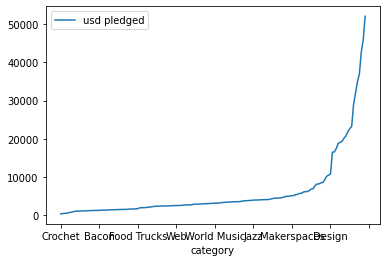

In [ ]:
categories_mean_sorted.plot()

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer the following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/marvel-universe-social-network

# download the dataset from Kaggle and unzip it
!kaggle datasets download csanhueza/the-marvel-universe-social-network -f hero-network.csv -p ./datasets/marvel-universe-social-network
!kaggle datasets download csanhueza/the-marvel-universe-social-network -f nodes.csv -p ./datasets/marvel-universe-social-network
!unzip ./datasets/marvel-universe-social-network/*.zip  -d ./datasets/marvel-universe-social-network
# Load data
df_marvel = pd.read_csv('./datasets/marvel-universe-social-network/hero-network.csv')
df_nodes = pd.read_csv('./datasets/marvel-universe-social-network/nodes.csv')

  0% 0.00/2.32M [00:00<?, ?B/s]
100% 2.32M/2.32M [00:00<00:00, 75.9MB/s]
  0% 0.00/289k [00:00<?, ?B/s]
100% 289k/289k [00:00<00:00, 43.6MB/s]
Archive:  ./datasets/marvel-universe-social-network/hero-network.csv.zip
  inflating: ./datasets/marvel-universe-social-network/hero-network.csv  


In [ ]:
df_marvel_no_duplicates = df_marvel.drop_duplicates()

hero_1_groupby = df_marvel_no_duplicates.groupby("hero1")
hero_2_groupby = df_marvel_no_duplicates.groupby("hero2")

hero_1_count = hero_1_groupby.size().to_frame(name='counts hero 1').sort_values('counts hero 1', ascending=0)
hero_2_count = hero_2_groupby.size().to_frame(name='counts hero 2').sort_values('counts hero 2', ascending=0)

joined_df = pd.merge(hero_1_count, hero_2_count, left_index=True, right_index=True)
joined_df["total counts"] = joined_df["counts hero 1"] +joined_df["counts hero 2"] 
joined_df = joined_df[["total counts"]] 

print("The top-10 most friendly characters")
joined_df.iloc[:10]

The top-10 most friendly characters


total counts
CAPTAIN AMERICA               2854
SPIDER-MAN/PETER PAR          2563
IRON MAN/TONY STARK           2238
WOLVERINE/LOGAN               2036
SCARLET WITCH/WANDA           1932
THING/BENJAMIN J. GR          2023
HUMAN TORCH/JOHNNY S          1939
MR. FANTASTIC/REED R          1958
THOR/DR. DONALD BLAK          1913
VISION                        1814

**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

In [ ]:
!pip install networkx
import networkx as nx

most_friendly = joined_df.iloc[:150].index.tolist()
df_marvel_most_friendly = df_marvel[df_marvel["hero1"].isin(most_friendly) & df_marvel["hero2"].isin(most_friendly)]

graph = nx.DiGraph()
for hero in most_friendly:
  graph.add_node(hero, degree=joined_df.loc[hero]["total counts"])

for _, row in df_marvel_most_friendly.iterrows():
  graph.add_edge(row["hero1"], row["hero2"])

sizes = [node[1]["degree"] for node in graph.nodes(data=True)]


nx.info(graph)

'DiGraph with 150 nodes and 14809 edges'

In [ ]:
from statistics import mode

nodes_keys = list(df_nodes.node)
types = {}

for node in graph.nodes(data=True):
  exact_type_found = False
  partial_match_types = []
  # Finding the character type
  for node_key in nodes_keys:
    if exact_type_found:
      break
    if node[0] == node_key: # if the keys are an exact match 
      types[node[0]] = df_nodes[df_nodes["node"] == node[0]]["type"].iloc[0] # then use the type and stop searching
      exact_type_found = True
    elif node[0] in node_key or node_key in node[0]: #else, if the match is only partial ("LIKE")
      partial_match_types.append(df_nodes[df_nodes["node"] == node_key]["type"].iloc[0]) # then add the type to a list and use the most common value as the type
  if not exact_type_found:
    types[node[0]] = mode(partial_match_types)# mode

types_encoding = ["red" if character_type== 'comic' else "c" for character_type in types]
#all the characters are heroes

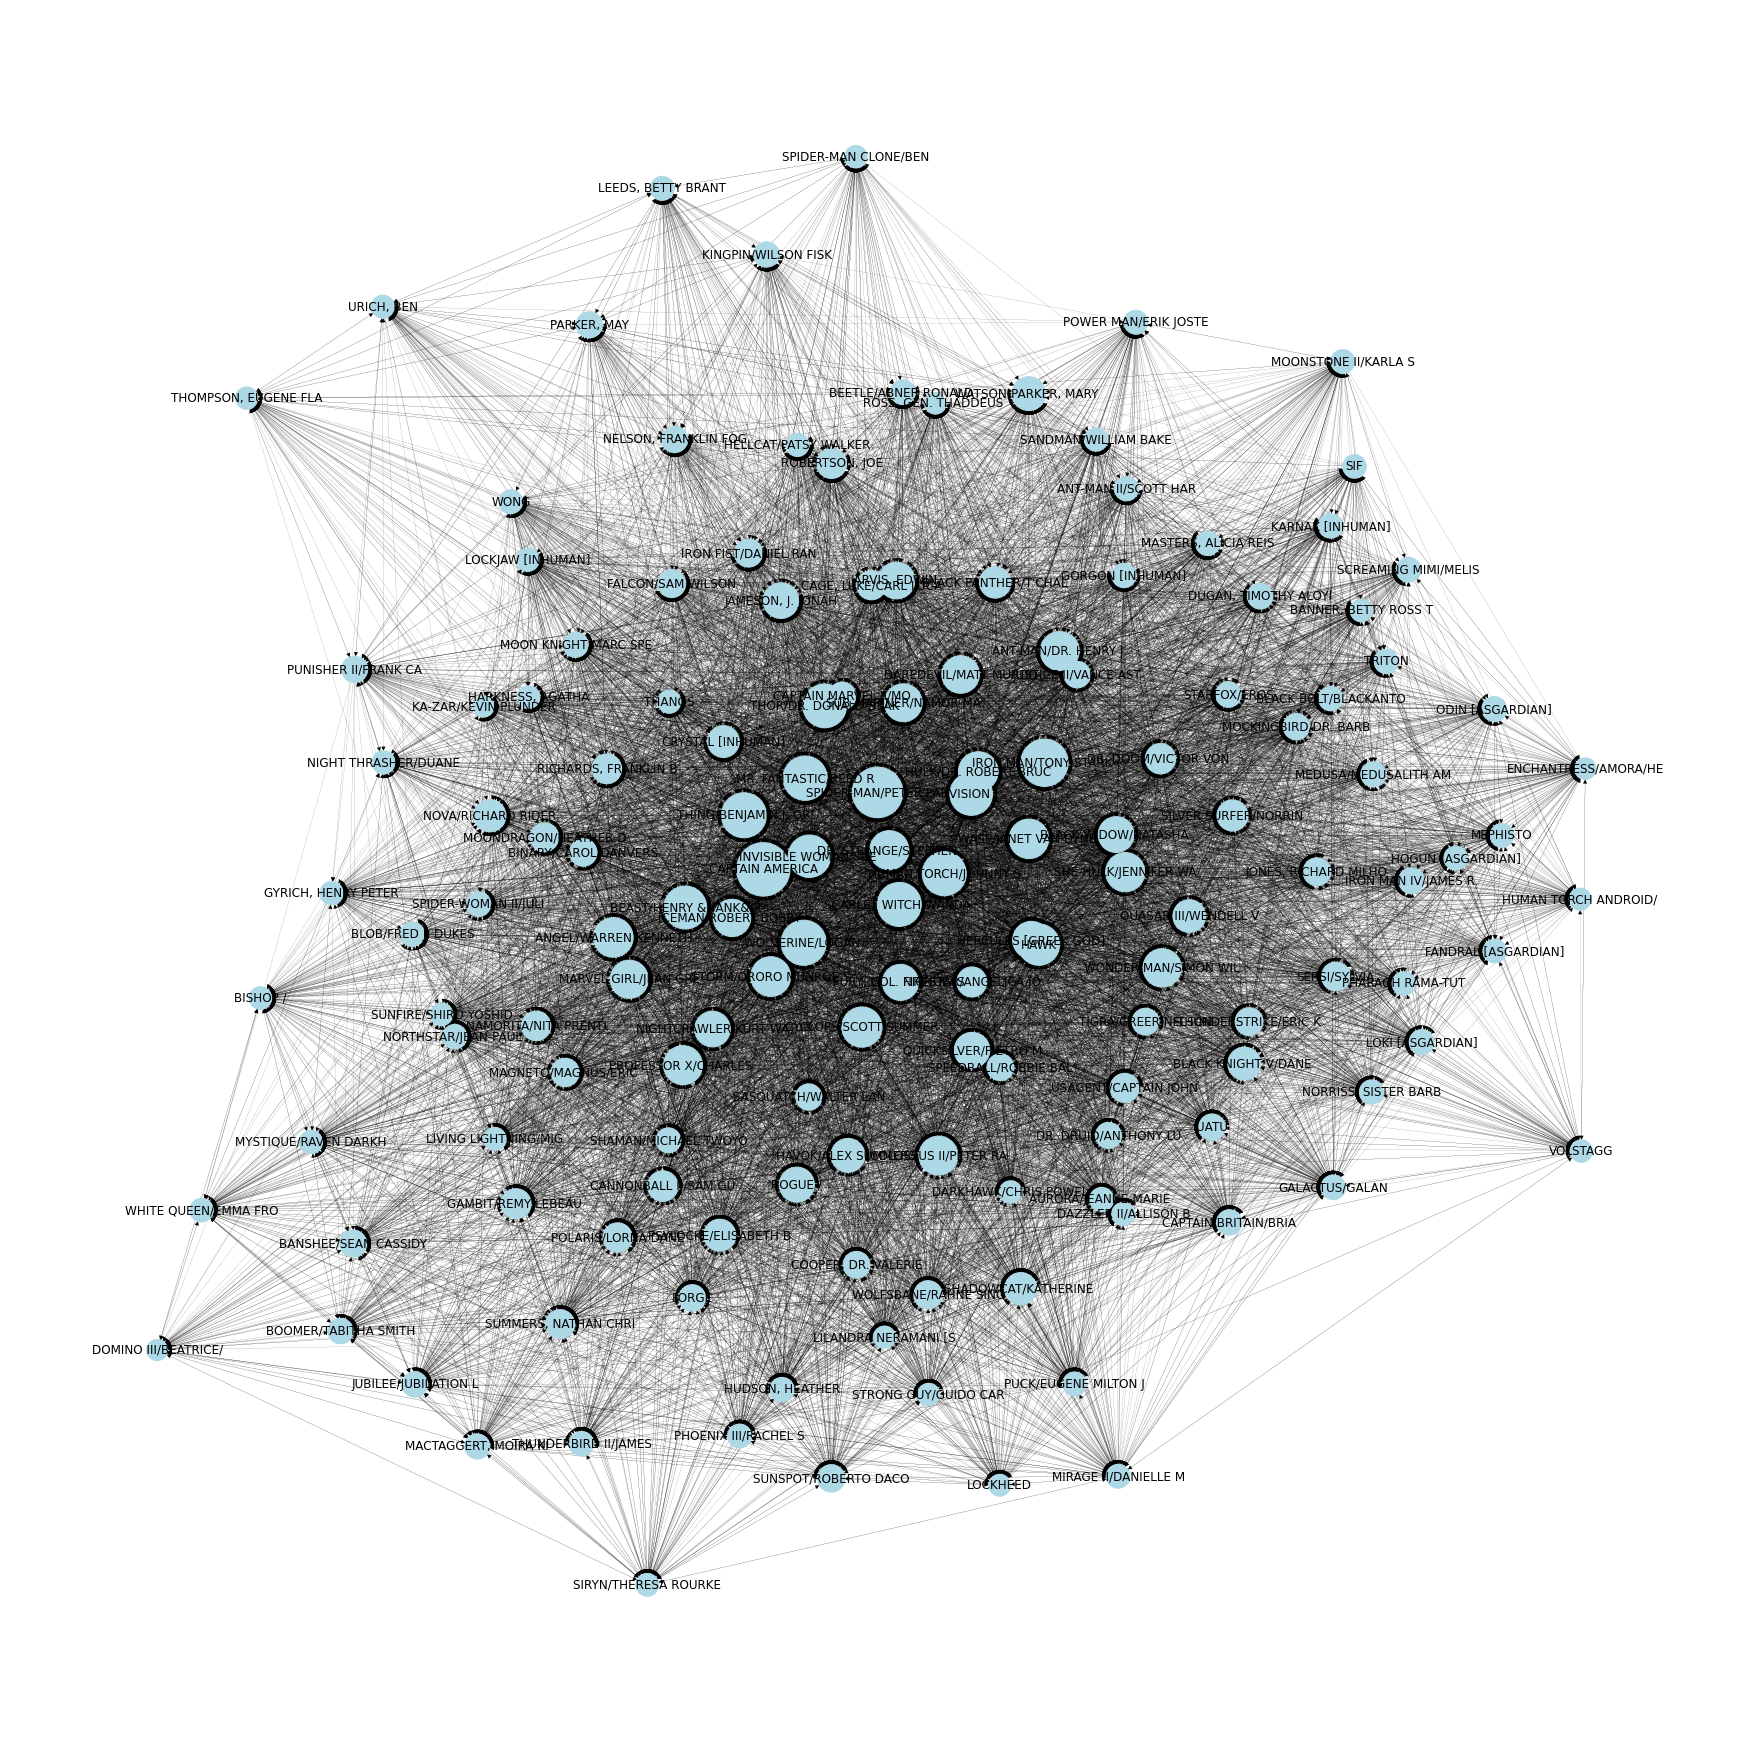

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(3,figsize=(24,24))
nx.draw_spring(graph, with_labels=True, node_size=sizes, node_color=types_encoding, width=0.1)
plt.show()

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)

In [ ]:
!pip install py2cytoscape

nx.write_gexf(graph, './datasets/marvel-universe-social-network/network.gexf') 
